In [3]:
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
fm = mp.font_manager.FontManager()
plt.rcParams['font.family'] = 'Malgun Gothic'


list_age = ['계','19~44','45~64','65~74','75 이상']
list_sex = ['계','남','여']
idx_sex = []
idx_age = []
idx_topic = []
value = []
i1 =''

for z in range(9,10):
    for i in list_age:
        for j in list_sex:
            data1 = pd.read_csv('../전처리된 데이터/통합 테이블(공원)_2019.csv')
            data2 = pd.read_csv('../전처리된 데이터/통합 테이블(건강)_2019.csv')
            data2.rename(columns={'지역':'자치구'},inplace = True)
            df2 = data2[data2['연령별'] == i]
            df2 = df2[df2['성별'] == j]
            df2.set_index('자치구',inplace = True)
            data1.set_index('자치구',inplace = True)
            df = pd.concat([df2,data1],axis=1)
            df = df.drop(df.index[0])
            df = df.drop(['연령별','성별'],axis=1)
            df1 = df[[df.columns[z],'1인당 생활권 도시림 면적']]
            corr = df1.corr()
            value.append(corr.iloc[0][1])
            idx_age.append(i)
            idx_sex.append(j)
            idx_topic.append(df.columns[z])

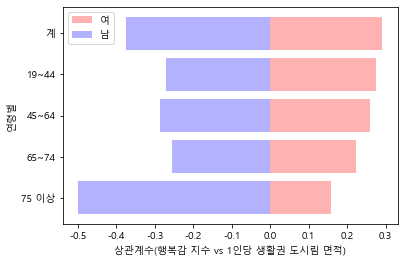

In [7]:
df_final = pd.DataFrame({'주관적 건강수준':value, '주제':idx_topic,'연령별':idx_age,'성별':idx_sex})

df_final = df_final.set_index(['주제','연령별','성별'])

df_final.reset_index(inplace = True)

mp.rcParams['axes.unicode_minus'] = False


women = np.array(df_final[df_final['성별']=='여']['주관적 건강수준'])[::-1]

men = np.array(df_final[df_final['성별']=='남']['주관적 건강수준'])[::-1]

x = ['75 이상','65~74','45~64','19~44','계']



plt.barh(x, women, color="r", alpha = 0.3)

plt.barh(x, -men, color="b",alpha = 0.3)
plt.legend(['여','남'])
plt.xlabel('상관계수(행복감 지수 vs 1인당 생활권 도시림 면적)')
plt.ylabel('연령별')

plt.show()

In [12]:
data3 = pd.read_csv('../전처리된 데이터/서울시 주민등록인구 (연령별구별) 통계_2019_Q4.csv')
data4 = pd.read_csv('../전처리된 데이터/통합 테이블(건강)_2019.csv')

data4.rename(columns={'지역':'자치구'},inplace = True)
df2 = data4[data4['자치구'] == '서울시']
df2 = df2[df2['연령별'] != '계']
df2 = df2[df2['성별'] == '계']
df2.set_index('자치구', inplace = True)

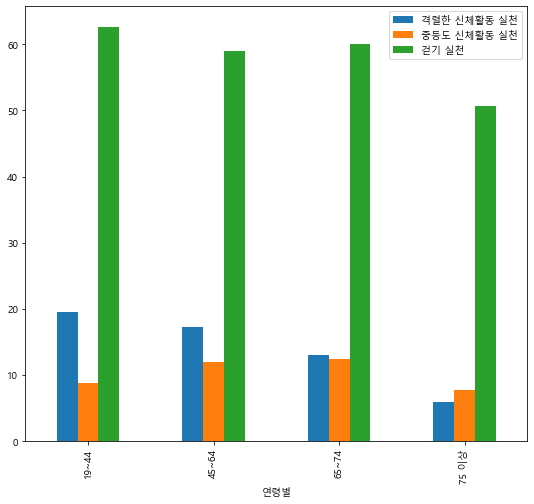

In [13]:
df2.plot(x="연령별", y=["격렬한 신체활동 실천", "중등도 신체활동 실천", "걷기 실천"], kind="bar",figsize=(9,8))
plt.show()

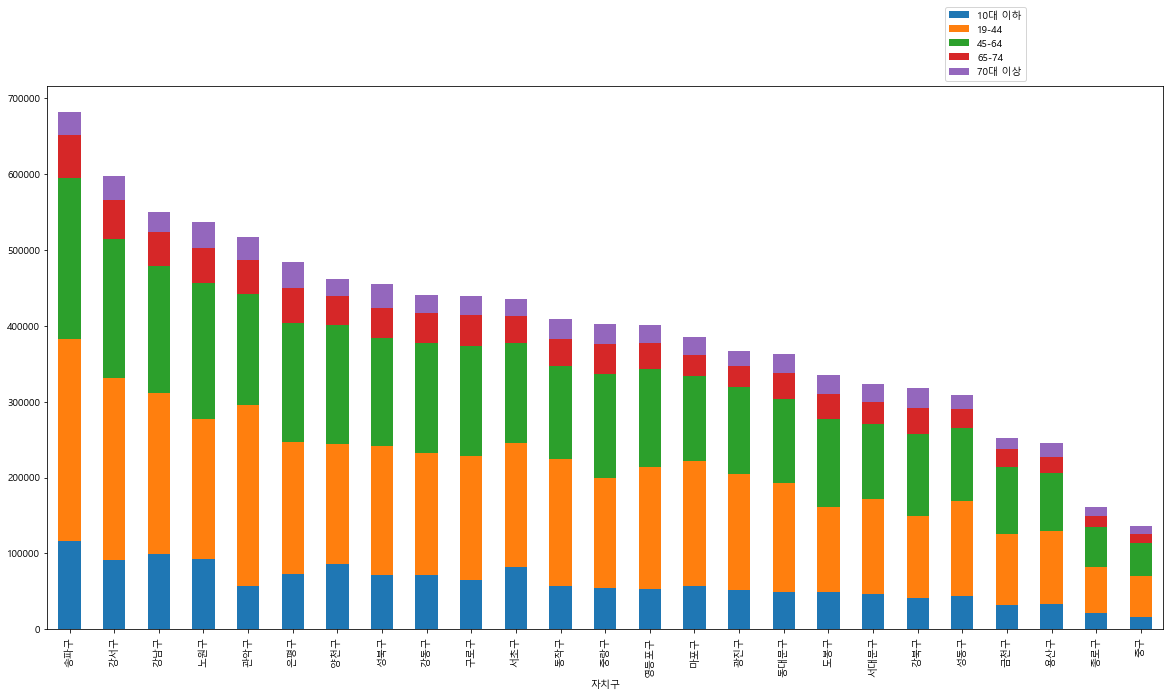

In [14]:
data3.sort_values(by = ['주민등록인구'],ascending=False, axis=0, inplace = True)
df3 = data3.drop(['주민등록인구'], axis='columns') 
df3 = df3[df3['자치구'] != '서울시']
df3.set_index('자치구',inplace=True)
df3.plot(kind="bar",stacked=True,figsize=(20,10))
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.show()

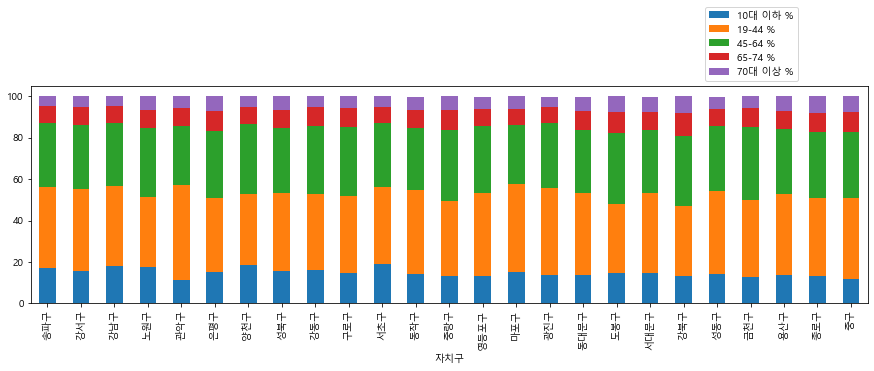

In [18]:
data3['10대 이하 %'] = round(data3['10대 이하']/data3['주민등록인구']*100,1)
data3['19-44 %'] = round(data3['19-44']/data3['주민등록인구']*100,1)
data3['45-64 %'] = round(data3['45-64']/data3['주민등록인구']*100,1)
data3['65-74 %'] = round(data3['65-74']/data3['주민등록인구']*100,1)
data3['70대 이상 %'] = round(data3['70대 이상']/data3['주민등록인구']*100,1)

cols = data3.columns
df4 = data3.drop(cols[1:7],axis=1) 
df4 = df4[df4['자치구'] != '서울시']
df4.set_index('자치구',inplace=True)
df4.plot(kind="bar",stacked=True,figsize=(15,4))
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.show()